In [13]:
import os
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sns.set_theme(style="white")


In [14]:
path = 'PAN/Data/'
paths = [path +csv for csv in os.listdir(path)]
CLEAN = [path for path in paths if 'CLN' in path]

In [15]:
uniques = {}
data = pd.read_csv(CLEAN[0])
columns = data.columns
same_cols = True

for path in CLEAN:
    
    data = pd.read_csv(path)
    if (data.columns != columns).all():
        same_cols = False
    for col in data:
        if col not in uniques.keys():
            uniques[col] = set()
        unique_values = set(data[col].unique())
        uniques[col] = uniques[col].union(unique_values)

print('Tables share column names = {}\n'.format(same_cols))

unique_values = pd.DataFrame({'Column':uniques.keys(), 'Values': uniques.values()})
unique_values

Tables share column names = True



,Column,Values
0,i_smx,"{False, True}"
1,i_sgv,"{False, True}"
2,i_sgn,"{False, True}"
3,i_rsg,"{0.0, 1e-05, 0.0001, 1e-06}"
4,i_rer,"{0.0, 0.4, 0.1, 0.3, 0.2, 0.5, 0.75, 1.0}"
5,i_ren,"{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}"
6,i_qnt,"{50, 75, 90}"
7,i_gsv,"{0.0, 0.0001573, 0.0075634, 4.3200000000000007..."
8,i_fic,"{0.0, 0.4, 0.1, 0.3, 0.2, 0.5, 0.6, 0.7, 0.8, ..."
9,0.95,"{0, 1, 2, 3, 4}"


In [16]:
data = pd.read_csv(CLEAN[-1])

FEATS = list(data.columns[:9])
FEATS.remove('i_qnt')
LABELS = data.columns[9:]
data.sample(8,random_state=10)

,i_smx,i_sgv,i_sgn,i_rsg,i_rer,i_ren,i_qnt,i_gsv,i_fic,0.95,0.9,0.75,0.5,0.25,0.1,0.05
2413,True,False,False,0.000010,0.10,2,50,0.000043,0.9,1,1,1,1,0,0,0
42491,False,False,True,0.000001,0.50,10,50,0.007563,0.7,2,1,1,1,0,0,0
19150,False,True,False,0.000100,0.10,9,50,0.000157,0.2,4,4,4,4,4,4,4
3651,True,False,False,0.000010,0.10,9,50,0.007563,1.0,1,1,0,0,0,0,0
20649,False,True,False,0.000001,0.20,7,50,0.000043,0.3,4,4,4,4,4,4,4
42320,False,False,True,0.000001,0.50,9,50,0.000000,0.9,4,4,4,4,4,4,4
31176,False,False,True,0.000000,0.00,1,50,0.000000,0.6,0,0,0,0,0,0,0
11872,True,False,False,0.000001,0.75,1,50,0.000000,0.9,4,4,4,4,4,4,4


And see if there's any correlation

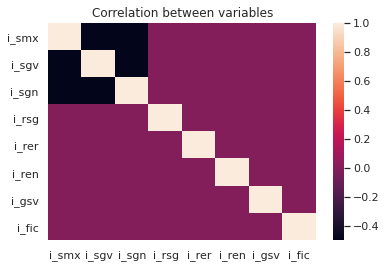

In [19]:
sns.heatmap(data[FEATS].corr(),annot=False)
plt.title('Correlation between variables')
plt.show()

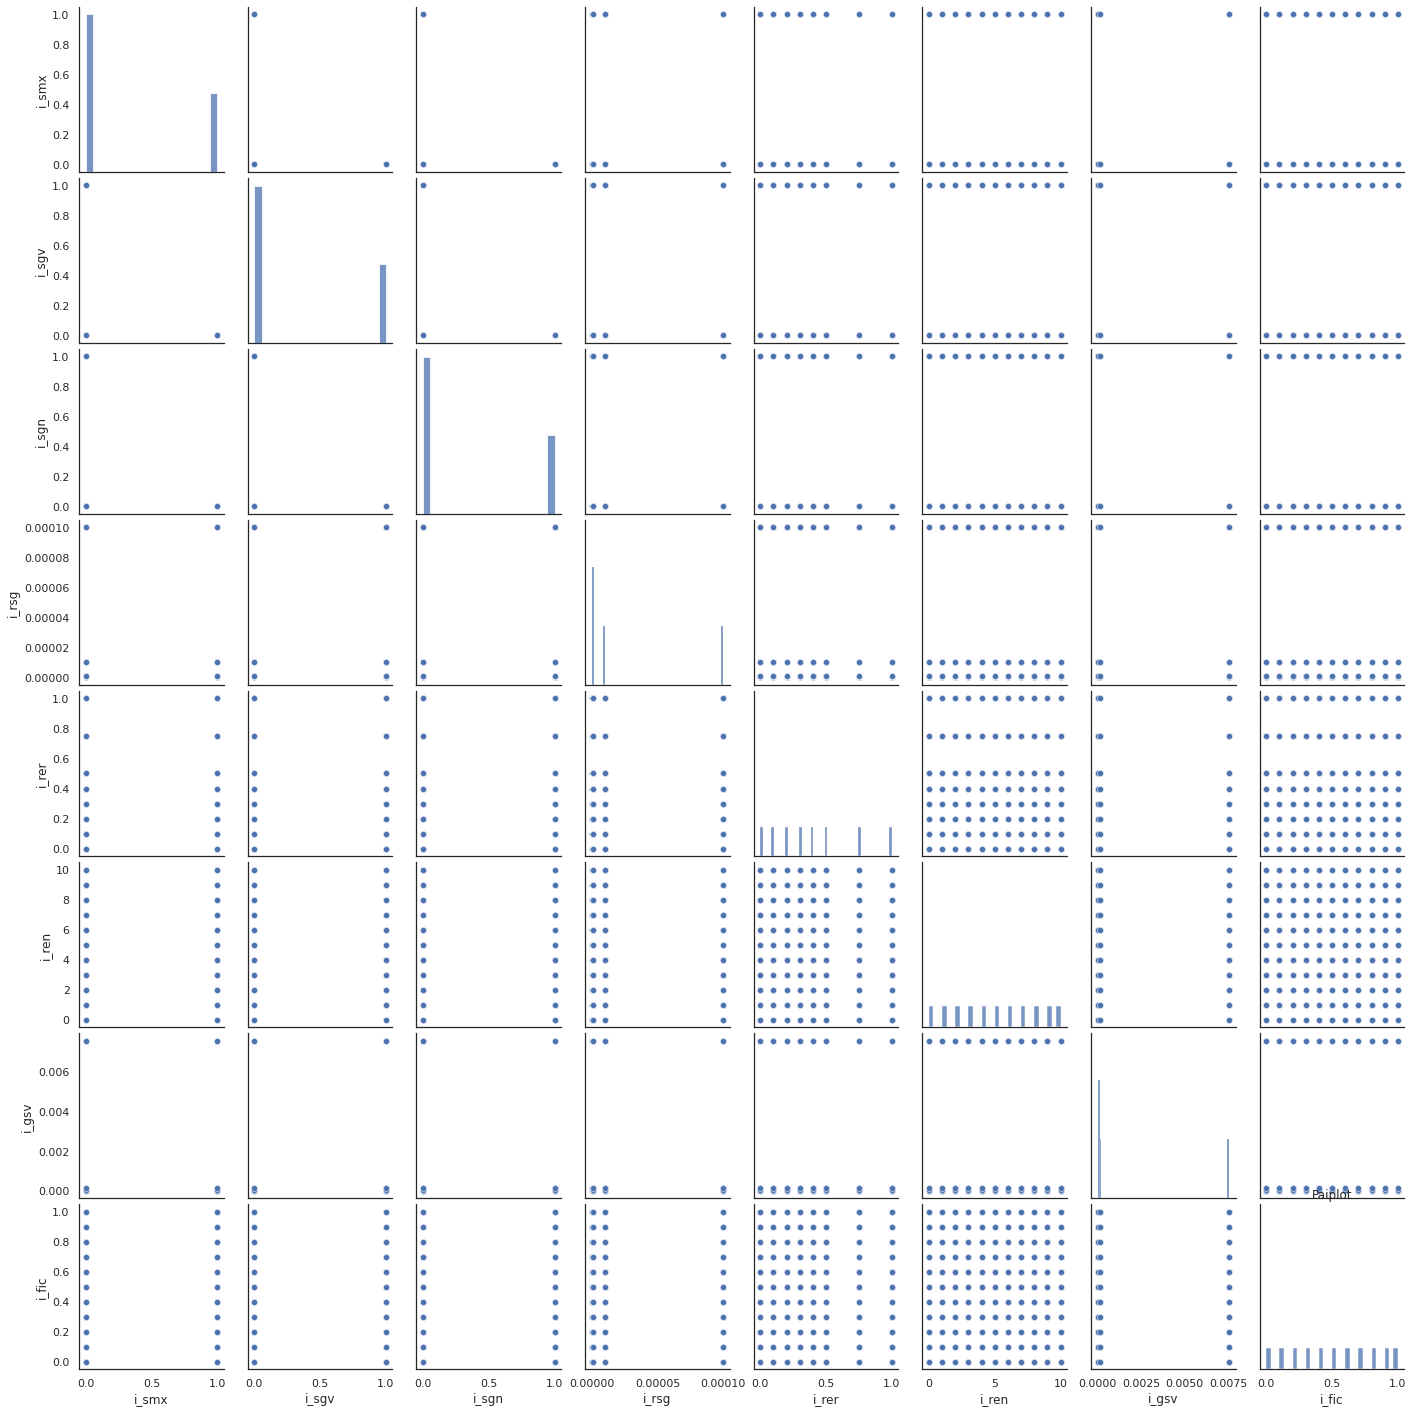

In [18]:
sns.pairplot(data[FEATS],palette='dark')
plt.title('Paiplot')
plt.show()